## Indicators

In [1]:
#!pip install geopandas contextily mapclassify  plotly tenacity==8.3.0 asyncio
%load_ext autoreload
%autoreload 2

In [2]:
from utils.indicators import Indicators

kpis = Indicators(verbose=False).request(
    address="Madrid, spain",
    boundary_type=13,
    resolution=15,
    geometry=1,
    sort_by='output_priceunit',
    ascending=0,
)

kpis.df

boundary_id  boundary_type            boundary_admin  \
period_code                                                         
2024Q1             26606             15  1-14-48-4440-13964-26606   
2024Q1             26611             15  1-14-48-4440-13964-26611   
2024Q1             26604             15  1-14-48-4440-13963-26604   
2024Q1             26627             15  1-14-48-4440-13967-26627   
2024Q1             26610             15  1-14-48-4440-13964-26610   
...                  ...            ...                       ...   
2024Q1             26696             15  1-14-48-4440-13977-26696   
2024Q1             26659             15  1-14-48-4440-13972-26659   
2024Q1             26666             15  1-14-48-4440-13973-26666   
2024Q1             26693             15  1-14-48-4440-13977-26693   
2024Q1             26694             15  1-14-48-4440-13977-26694   

             boundary_name  operation  construction_type  category_id  \
period_code                                                             
2024Q1           Recoletos          1                  2            0   
2024Q1          Castellana          1                  2            0   
2024Q1           Jerónimos          1                  2            0   
2024Q1             Almagro          1                  2            0   
2024Q1               Lista          1                  2            0   
...                    ...        ...                ...          ...   
2024Q1         Los Rosales          1                  2            0   
2024Q1           Orcasitas          1                  2            0   
2024Q1           Entrevías          1                  2            0   
2024Q1          San Andrés          1                  2            0   
2024Q1       San Cristóbal          1                  2            0   

             output_priceunit  output_priceunit_official  output_pricemean  \
period_code                                                                  
2024Q1                11667.0                    11667.0         2350000.0   
2024Q1                 8861.0                     8861.0         1450000.0   
2024Q1                 8591.0                     7942.0         1230000.0   
2024Q1                 8170.0                     8170.0         1650000.0   
2024Q1                 7433.0                     7433.0          800000.0   
...                       ...                        ...               ...   
2024Q1                 2022.0                     2022.0          157500.0   
2024Q1                 2000.0                     2000.0          219500.0   
2024Q1                 1918.0                     1918.0          145000.0   
2024Q1                 1902.0                     1902.0          139000.0   
2024Q1                 1406.0                     1406.0           91000.0   

             ...  output_priceunit_percentile70_raw  \
period_code  ...                                      
2024Q1       ...                            13077.0   
2024Q1       ...                            10274.0   
2024Q1       ...                            11514.0   
2024Q1       ...                             9519.0   
2024Q1       ...                             8571.0   
...          ...                                ...   
2024Q1       ...                             2250.0   
2024Q1       ...                             2529.0   
2024Q1       ...                             2143.0   
2024Q1       ...                             2106.0   
2024Q1       ...                             1653.0   

             output_priceunit_percentile80_raw  \
period_code                                      
2024Q1                                 13780.0   
2024Q1                                 11739.0   
2024Q1                                 13583.0   
2024Q1                                 10360.0   
2024Q1                                  9000.0   
...                                        ...   
2024Q1                            

In [4]:
import folium
import branca

feat = "output_priceunit"

# Create the colomap styles
colormap = branca.colormap.LinearColormap(
    vmin=kpis.df[feat].quantile(0.0),
    vmax=kpis.df[feat].quantile(1),
    colors=["red", "orange", "lightblue", "green", "darkgreen"],
    caption=feat,
)

style=dict(weight=.05)

kpis.df.explore(
    tooltip=['boundary_name', feat],
    column=feat, 
    cmap=colormap,
    style_kwds=style,
    tiles='CartoDB positron',
)

In [5]:
import plotly.express as px
import matplotlib.pyplot as plt

kpis = Indicators().request(
    address="Madrid, spain",
    boundary_type=10,
    resolution=15,
    sort_by='output_priceunit',
    ascending=0,
    geometry=True,
    limit=20
)

df = kpis.df

selection = df.boundary_id.unique().tolist()

selection

[20324,
 26606,
 24722,
 20344,
 20142,
 20178,
 20177,
 20342,
 20129,
 20327,
 26611,
 20323,
 26604,
 20141,
 26627,
 20133,
 20174,
 26610,
 26590,
 20343]

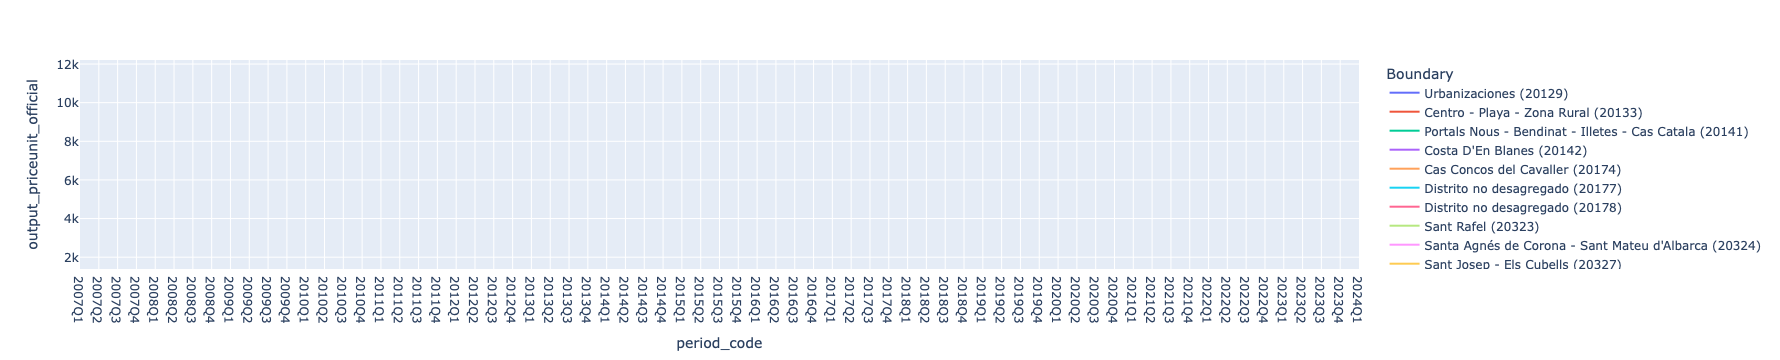

In [6]:
kpis = Indicators().request(
    boundary_id=",".join([str(b) for b in selection]),
    start_date='2007-01-01',
    sort_by='period_code',
    ascending=1
    
)

kpis.df['Boundary'] = kpis.df.apply(lambda x: f"{x['boundary_name']} ({x['boundary_id']})", axis=1)

fig = px.line(kpis.df.reset_index(), x="period_code", y="output_priceunit_official", color="Boundary")
fig.show()